In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from functools import reduce

In [4]:
sales=pd.read_csv('sales.csv')
weather=pd.read_csv('weather.csv')
fuel=pd.read_csv('fuel.csv')

##data cleaning

In [5]:
sales.dtypes

Store             int64
Category          int64
Date             object
Weekly_Sales    float64
Holiday            bool
dtype: object

In [6]:
weather.dtypes

Store            int64
Date            object
Temperature    float64
dtype: object

In [7]:
fuel.dtypes

Store           int64
Date           object
Fuel_Price    float64
dtype: object

In [8]:
#show the top ten weekly sales for stores
sales['Weekly_Sales'].nlargest(n=10)

95373     693099.36
338013    649770.18
95425     630999.19
337961    627962.93
135665    474330.10
195088    422306.25
264390    420586.57
88428     406988.63
95377     404245.03
214432    393705.20
Name: Weekly_Sales, dtype: float64

In [9]:
#show the top ten weekly tempreature for stores
weather['Temperature'].nlargest(n=10)

2180    101.95
5092    101.95
6912    101.95
5847    100.14
5955    100.07
5905     99.66
6002     99.66
2026     99.22
4938     99.22
6758     99.22
Name: Temperature, dtype: float64

In [10]:
fuel['Fuel_Price'].nlargest(n=10)

1778    4.468
2142    4.468
5054    4.468
5964    4.468
6874    4.468
7602    4.468
1779    4.449
2143    4.449
5055    4.449
5965    4.449
Name: Fuel_Price, dtype: float64

In [11]:
sales.describe()

,Store,Category,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [12]:
weather.describe()

,Store,Temperature
count,8190.000000,8190.000000
mean,23.000000,59.356198
std,12.987966,18.678607
min,1.000000,-7.290000
25%,12.000000,45.902500
50%,23.000000,60.710000
75%,34.000000,73.880000
max,45.000000,101.950000


In [13]:
fuel.describe()

,Store,Fuel_Price
count,8190.000000,8190.000000
mean,23.000000,3.405992
std,12.987966,0.431337
min,1.000000,2.472000
25%,12.000000,3.041000
50%,23.000000,3.513000
75%,34.000000,3.743000
max,45.000000,4.468000


In [14]:
num_missing=(sales[['Store','Category','Weekly_Sales']]<=0).sum()
num_missing
#sales.isna().sum()


Store              0
Category           0
Weekly_Sales    1358
dtype: int64

In [15]:
weather['Temperature']=weather['Temperature'].astype('float64')
num_missing2=(weather[['Store','Temperature']]<=0).sum()
num_missing2

Store          0
Temperature    4
dtype: int64

In [16]:
num_missing3=(fuel[['Store','Fuel_Price']]<=0).sum()
num_missing3
##this dataset hasn't have any values = 0

Store         0
Fuel_Price    0
dtype: int64

In [17]:
f=sales._get_numeric_data()
f[f<0]=0
sales=sales.replace(0,'NAN')
#we will remove all missing data after we replace all zeroes and negative values wit nan
sales.dropna()

,Store,Category,Date,Weekly_Sales,Holiday
0,1,1,2010-02-05,24924.5,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.9,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.1,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [18]:
m=weather._get_numeric_data()
m[m<0]=0
weather=weather.replace(0,'NAN')
weather.dropna()

,Store,Date,Temperature
0,1,2010-02-05,42.31
1,1,2010-02-12,38.51
2,1,2010-02-19,39.93
3,1,2010-02-26,46.63
4,1,2010-03-05,46.5
...,...,...,...
8185,45,2013-06-28,76.05
8186,45,2013-07-05,77.5
8187,45,2013-07-12,79.37
8188,45,2013-07-19,82.84


#merging the 3datasets in one dataset


In [19]:
data=pd.merge(pd.merge(sales,weather,on=['Store','Date']),fuel,on=['Store','Date'])
data.isnull().sum()
model_data=data.dropna()
model_data.isnull().sum()
#data.head(50)

Store           0
Category        0
Date            0
Weekly_Sales    0
Holiday         0
Temperature     0
Fuel_Price      0
dtype: int64

#data visualization

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(-20.0, 0, '2012-06-15'),
  Text(0.0, 0, '2010-02-05'),
  Text(20.0, 0, '2010-06-25'),
  Text(40.0, 0, '2010-11-12'),
  Text(60.0, 0, '2011-04-01'),
  Text(80.0, 0, '2011-08-19'),
  Text(100.0, 0, '2012-01-06'),
  Text(120.0, 0, '2012-05-25'),
  Text(140.0, 0, '2012-10-12'),
  Text(160.0, 0, '')])

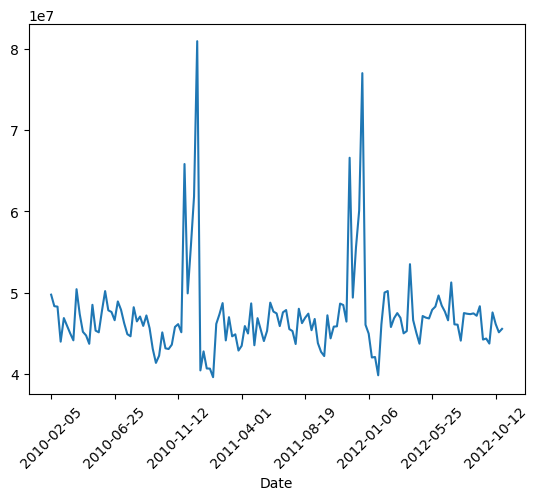

In [20]:
#1 make a chart to illustrate if weekly sales are increasing or decreasing over time
import seaborn as sns
model_data['Weekly_Sales']=model_data['Weekly_Sales'].astype('float64')
growing_over_days = model_data.groupby('Date')['Weekly_Sales'].sum()
growing_over_days.plot(x = growing_over_days.index,y=growing_over_days.values)
plt.xticks(rotation=45)
#sns.set(rc={'figure.figsize':(20,7)})

In [21]:
#average weekly sales for each store
sales1 = model_data.groupby(["Store"]).sum()
sales1['Weekly_Sales'] = model_data.groupby(["Store"]).mean()['Weekly_Sales']
sales1 = sales1.reset_index()
sales1=sales1.set_index('Store')
sales1['Weekly_Sales']
#//////////////////////

<ipython-input-21-48ef4f1a5ec2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales1 = model_data.groupby(["Store"]).sum()
<ipython-input-21-48ef4f1a5ec2>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales1['Weekly_Sales'] = model_data.groupby(["Store"]).mean()['Weekly_Sales']


Store
1     21749.145978
2     26961.734433
3      6380.226664
4     29175.540012
5      5065.283995
6     21960.799719
7      8379.492279
8     13148.994199
9      8805.882422
10    26474.084736
11    19332.641482
12    14929.244341
13    27399.631860
14    28885.743572
15     9045.551883
16     7897.132309
17    13023.154252
18    15820.075220
19    20430.857011
20    29627.580994
21    11328.537256
22    15247.436339
23    19839.563326
24    19002.604957
25    10346.216563
26    14568.937406
27    24897.723614
28    18741.608875
29     8185.783800
30     8785.125694
31    19761.897868
32    16403.222829
33     5736.388608
34    13546.210778
35    13989.575528
36     8619.227546
37    10308.816413
38     7503.727479
39    21084.103489
40    13783.028706
41    18031.506002
42    11519.913664
43    13463.138546
44     6061.841438
45    11695.871003
Name: Weekly_Sales, dtype: float64

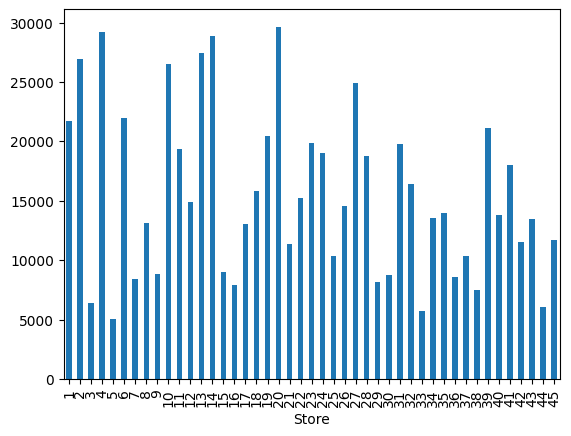

In [22]:
#2 Make a chart to show how much each brand sells.
growing_over_days =sales1.groupby('Store')['Weekly_Sales'].sum()
growing_over_days.plot.bar(x = growing_over_days.index,y=growing_over_days.values)
sns.set(rc={'figure.figsize':(20,10)})


In [23]:
#3 Determine the top ten selling stores
sales2= model_data.groupby(["Store"]).sum()
sales2['Weekly_Sales'] = model_data.groupby(["Store"]).sum()['Weekly_Sales']
sales2 = sales2.reset_index()
sales2=sales2.set_index('Store')
sales3=sales2['Weekly_Sales'].nlargest(n=10)
sales3

<ipython-input-23-3be00e14035e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales2= model_data.groupby(["Store"]).sum()
<ipython-input-23-3be00e14035e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales2['Weekly_Sales'] = model_data.groupby(["Store"]).sum()['Weekly_Sales']


Store
20    3.014014e+08
4     2.995453e+08
14    2.890019e+08
13    2.865180e+08
2     2.753872e+08
10    2.716241e+08
27    2.538572e+08
6     2.237586e+08
1     2.224068e+08
39    2.074465e+08
Name: Weekly_Sales, dtype: float64

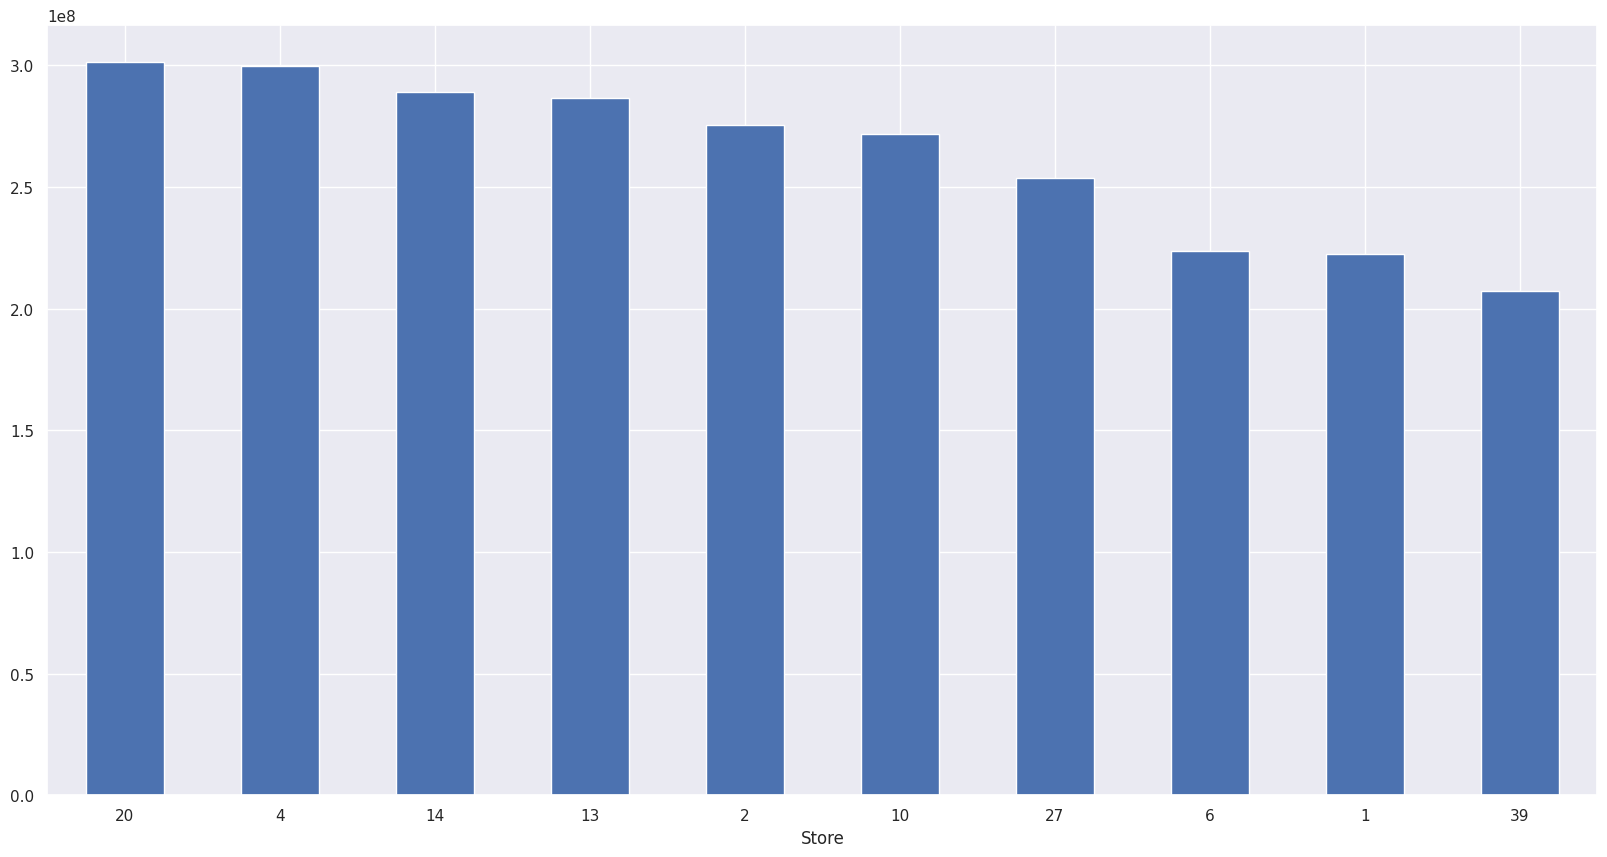

In [24]:
#Make a histogram to show the top 10 stores sales.
sales3.plot.bar(x="Store", y='Weekly_Sales', rot=0);

<Axes: xlabel='Store'>

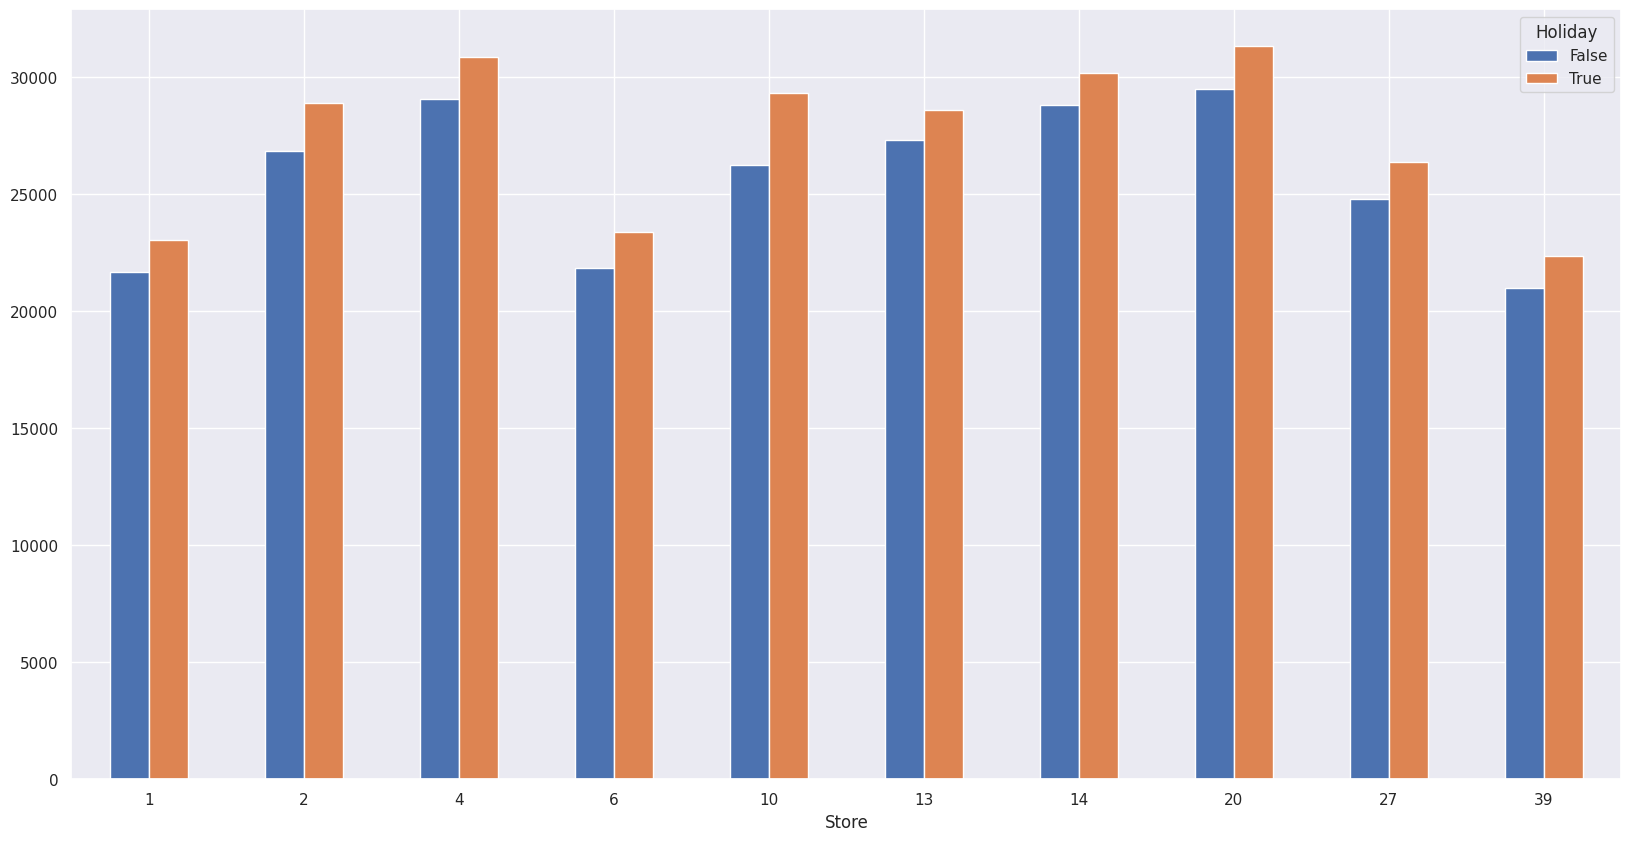

In [25]:
#5 top 10 stores's average weekly sales in holiday non hloday
arr=sales3.index.astype(int)

tStores=model_data[model_data['Store'].isin(arr)].index

top=model_data.iloc[tStores]

top=top.groupby(['Holiday','Store'])['Weekly_Sales'].mean()
top=top.to_frame()

top=top.pivot_table("Weekly_Sales","Store","Holiday")
top.plot(kind='bar',rot=0)


In [26]:
#average weekly sales for top 10 stores
max_avg=sales1['Weekly_Sales'].nlargest(10)
max_avg

Store
20    29627.580994
4     29175.540012
14    28885.743572
13    27399.631860
2     26961.734433
10    26474.084736
27    24897.723614
6     21960.799719
1     21749.145978
39    21084.103489
Name: Weekly_Sales, dtype: float64

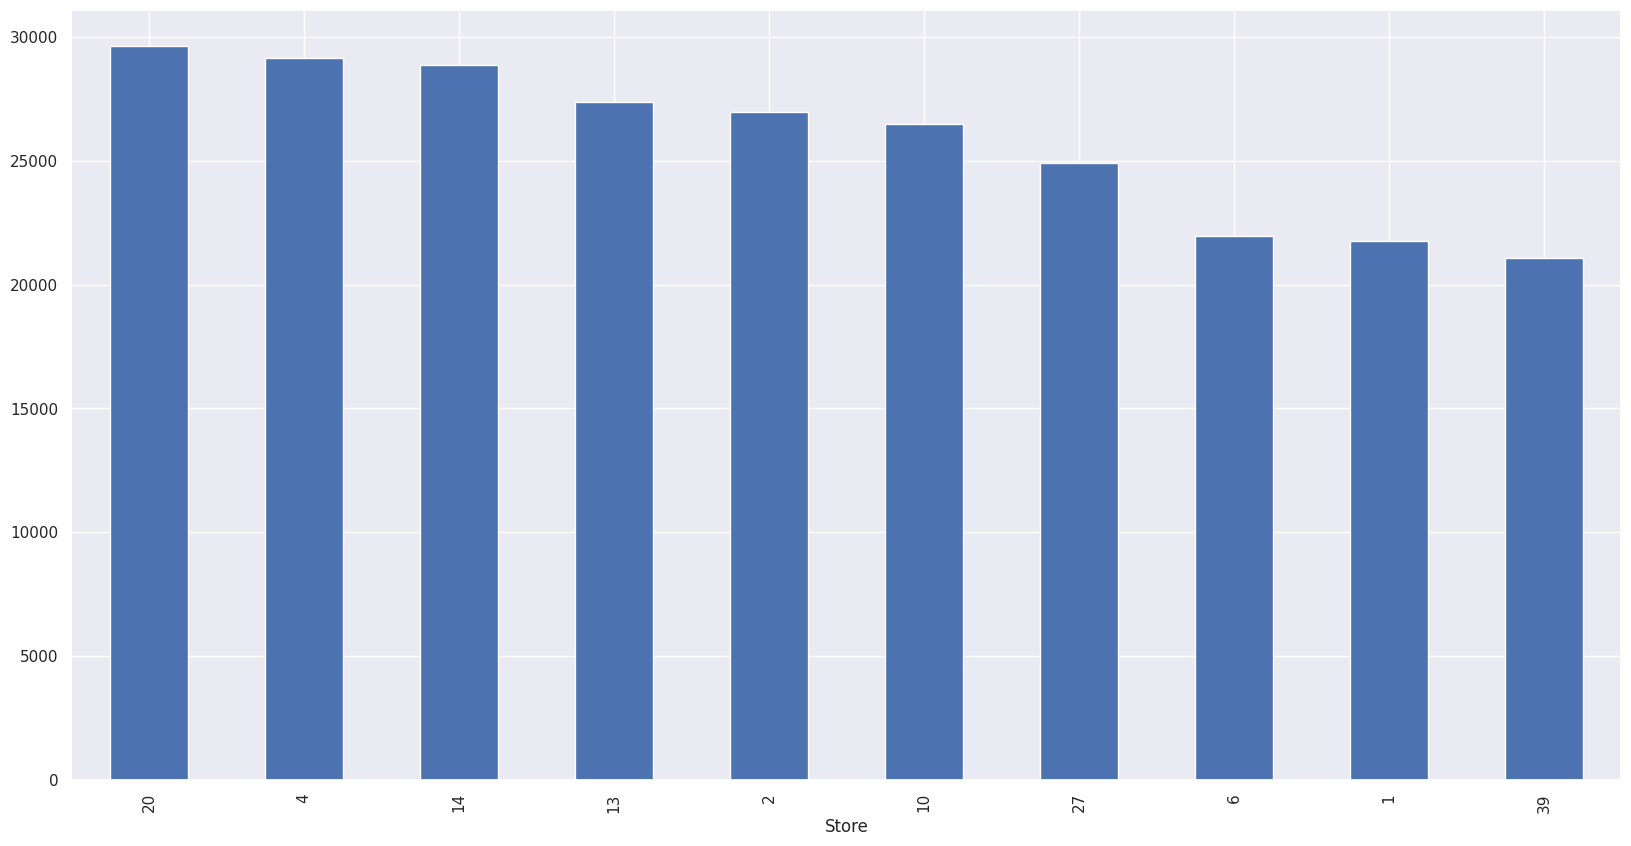

In [27]:
#6 Create a chart that displays the average weekly sales for each brand department for the top 10 selling stores.
max_avg.plot(x="ٍStore",y="Weekly_Sales",kind="bar")
plt.show()

<Axes: xlabel='Temperature'>

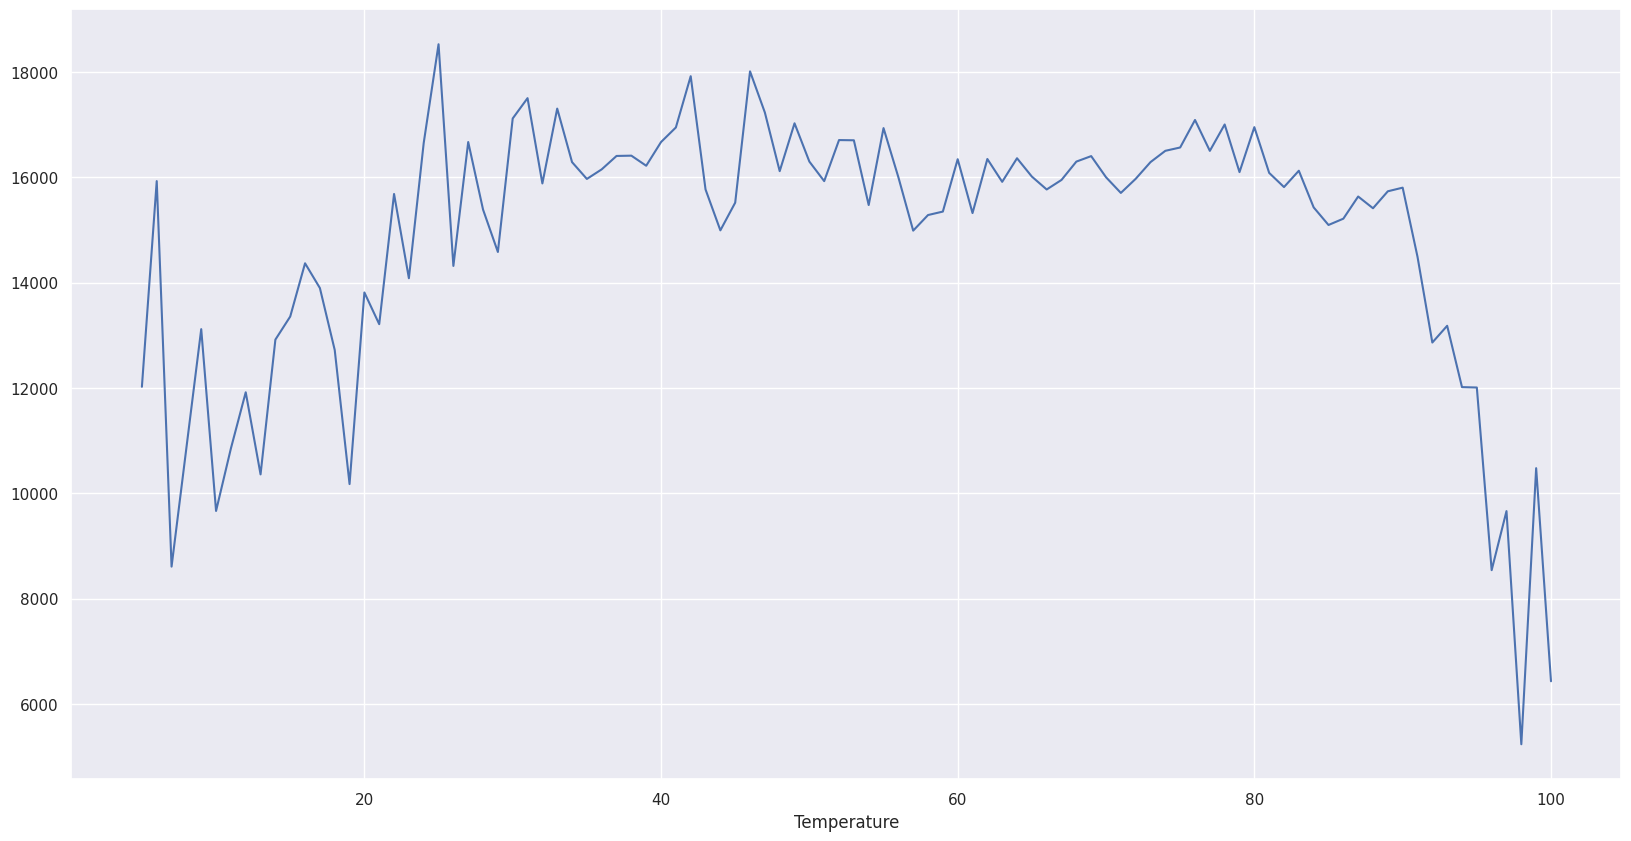

In [38]:
# 7 Make a line chart to show the relationship between weekly sales and weather Temperature
model_data=model_data.dropna()
model_data = model_data.dropna(subset=["Temperature"])
model_data["Temperature"]=model_data["Temperature"].astype('int')
temp1=model_data.groupby("Temperature")['Weekly_Sales'].mean().plot(kind='line')
temp1
#when tempereture is in the maximum the sales are decreasing

<Axes: xlabel='Fuel_Price'>

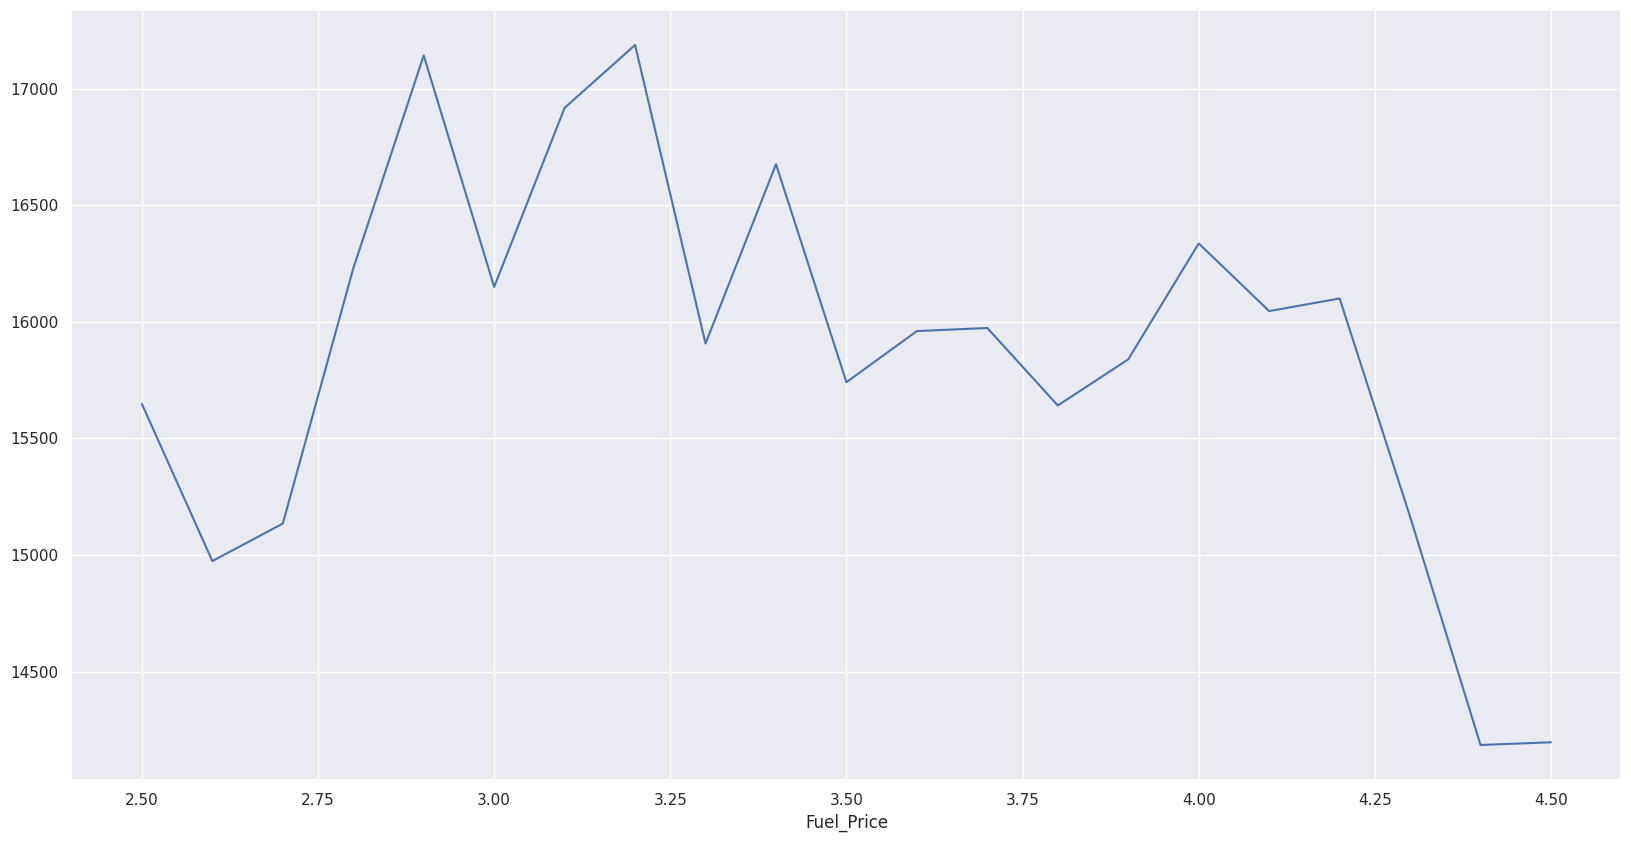

In [39]:
# 8 Make a line chart to show the relationship between the cost of fuel and weather weekly sales
model_data['Fuel_Price']=model_data['Fuel_Price'].round(decimals=1)
temp=model_data.groupby("Fuel_Price")["Weekly_Sales"].mean().plot(kind="line")
temp

In [40]:
#10 correlation matrix between features to know what features is correlated
corr=model_data.corr()
corr.style.background_gradient(cmap='coolwarm')


<ipython-input-40-4704d0f1a201>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=model_data.corr()


,Store,Category,Weekly_Sales,Holiday,Temperature,Fuel_Price
Store,1.000000,0.024257,-0.085193,-0.000574,-0.050837,0.063921
Category,0.024257,1.000000,0.148762,0.000662,0.004712,0.003521
Weekly_Sales,-0.085193,0.148762,1.000000,0.012828,-0.002547,-0.000187
Holiday,-0.000574,0.000662,0.012828,1.000000,-0.156286,-0.083665
Temperature,-0.050837,0.004712,-0.002547,-0.156286,1.000000,0.142863
Fuel_Price,0.063921,0.003521,-0.000187,-0.083665,0.142863,1.000000
